<a href="https://colab.research.google.com/github/byrneap23/FinalProject/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import random
import matplotlib.pyplot as plt

In [ ]:
# The user is given the probability to achieve within 3%
int_target = random.randint(1, 100)
print(f"Your target percentage to get within 3% of is {int_target}%.")
target = int_target

# User sets fixed target dice values (cannot change later)
d1_value = int(input("Enter what die number you want on the first die (this can't be changed after entered): "))
d2_value = int(input("Enter what die number you want on the second die (this can't be changed after entered): "))

# Fixed number of Monte Carlo trials
numTrials = 10000

Your target percentage to get within 3% of is 16%.
Enter what die number you want on the first die (this can't be changed after entered): 6
Enter what die number you want on the second die (this can't be changed after entered): 6



Attempt #1
Please enter the number of sides you would like on the die: 6
Now, enter the total number of rolls you want to happen: 24
The probability you achieved with your inputs was: 49.07%.
Sorry, your probability of 49.07% is not within 3% of the target (16%).
Trying again...

Attempt #2
Please enter the number of sides you would like on the die: 23
Now, enter the total number of rolls you want to happen: 40
The probability you achieved with your inputs was: 7.08%.
Sorry, your probability of 7.08% is not within 3% of the target (16%).
Trying again...

Attempt #3
Please enter the number of sides you would like on the die: 6
Now, enter the total number of rolls you want to happen: 10
The probability you achieved with your inputs was: 24.13%.
Sorry, your probability of 24.13% is not within 3% of the target (16%).
Trying again...

Attempt #4
Please enter the number of sides you would like on the die: 6
Now, enter the total number of rolls you want to happen: 4
The probability you achie

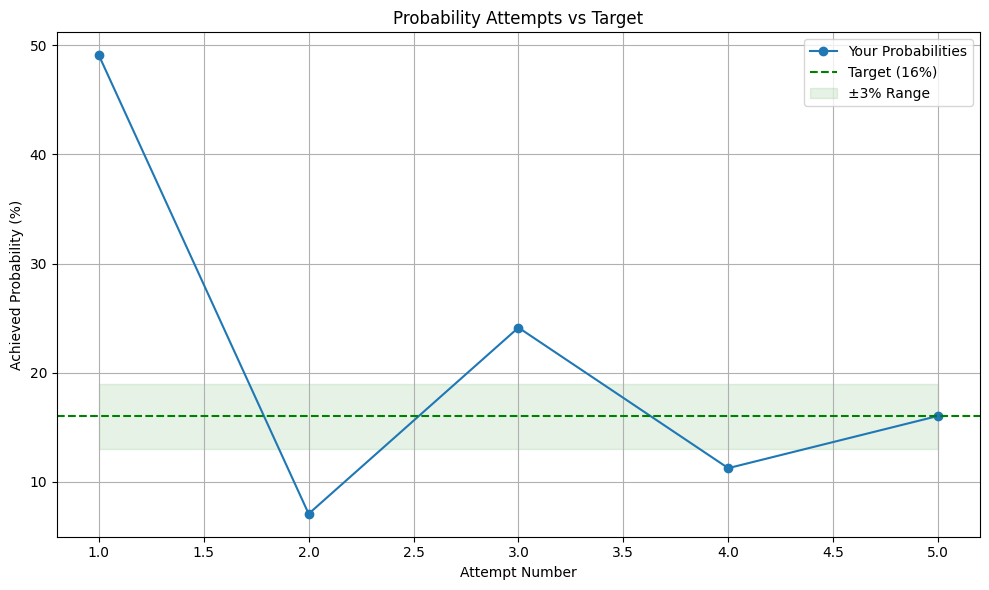

In [ ]:


# Die rolling function (sides passed in)
def rollDie(sides):
    return random.randint(1, sides)

# Simulation function
def MonteProb(rolls, d1_value, d2_value, sides):
    numwins = 0.0
    for i in range(numTrials):
        for j in range(rolls):
            d1 = rollDie(sides)
            d2 = rollDie(sides)
            if d1 == d1_value and d2 == d2_value:
                numwins += 1
                break
    prob = (numwins / numTrials) * 100
    return prob

# Track attempt number and probabilities
attempt = 1
prob_history = []

# Loop until success
while True:
    print(f"\nAttempt #{attempt}")
    sides = int(input("Please enter the number of sides you would like on the die: "))
    rolls = int(input("Now, enter the total number of rolls you want to happen: "))

    prob = MonteProb(rolls, d1_value, d2_value, sides)
    prob_history.append(prob)

    print(f"The probability you achieved with your inputs was: {prob:.2f}%.")

    if abs(prob - target) <= 3:
        print(f"Congrats! Your probability of {prob:.2f}% is within 3% of the target ({target}%)!")
        break
    else:
        print(f"Sorry, your probability of {prob:.2f}% is not within 3% of the target ({target}%).")
        print("Trying again...")
        attempt += 1

# 📊 Plotting after success
plt.figure(figsize=(10, 6))
plt.plot(range(1, attempt + 1), prob_history, marker='o', label="Your Probabilities")
plt.axhline(y=target, color='green', linestyle='--', label=f"Target ({target}%)")
plt.fill_between(range(1, attempt + 1), target - 3, target + 3, color='green', alpha=0.1, label="±3% Range")

plt.title("Probability Attempts vs Target")
plt.xlabel("Attempt Number")
plt.ylabel("Achieved Probability (%)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()